In [1]:
# Install required packages
!pip install diffusers transformers torch
!pip install accelerate
!pip matplotlib numpy


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [18]:
!pip install diffusers torch pillow ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [20]:
!pip install huggingface_hub


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

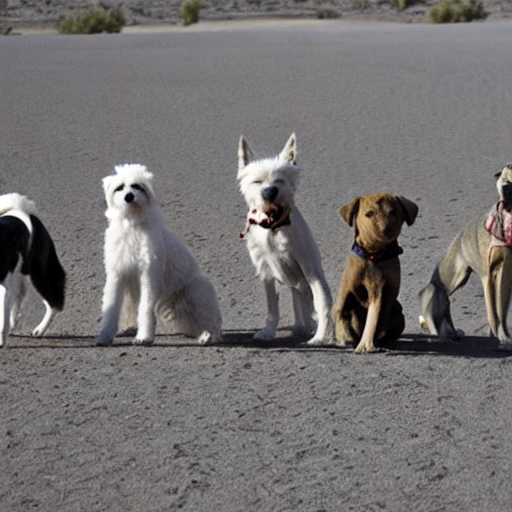

Button(description='Save Image', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from IPython.display import display
import ipywidgets as widgets
from google.colab import files

# Load a publicly available Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"  # Example model
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Define your prompt and parameters
prompt = "There are Five different dogs in desert"
negative_prompt = ""
num_inference_steps = 28
guidance_scale = 7.0

# Generate the image
image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale
).images[0]

# Save the image
image_path = "cat_hello_world.jpg"
image.save(image_path)

# Display the image
display(image)

# Define the button click functionality to save the image
def on_button_click(b):
    files.download(image_path)

# Create and display the save button
save_button = widgets.Button(description="Save Image")
save_button.on_click(on_button_click)
display(save_button)
